In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector
from qiskit.compiler import transpile, assemble
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from numpy import pi
import numpy as np

Soit une fonction $f:\{0, 1\} \rightarrow \{0, 1\}$, nous cherchons à savoir si $f$ est :
- **Constante** : $f(0) = f(1)$
- **Équilibrée** : $f(0) \neq f(1)$

En informatique "classique", il est nécessaire d'évaluer $f$ deux fois (une fois pour chaque entrée) pour déterminer si elle est constante ou équilibrée.

L'algorithme de Deutsch permet de le faire avec un seul appel à $f$.

Construisons les oracles des 4 fonctions basiques suivant :
- $f_0(x) = 0$
- $f_1(x) = 1$
- $f_2(x) = x$
- $f_3(x) = \overline{x}$

Par la suite $q_0$ correspond à $x$ et $q_1$ à $f(x)$

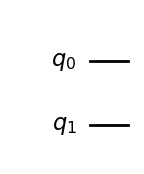

In [2]:
oracle_f0 = QuantumCircuit(2, name='f0')
oracle_f0.draw('mpl')

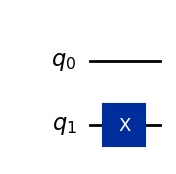

In [3]:
oracle_f1 = QuantumCircuit(2, name='f1')
oracle_f1.x([1])
oracle_f1.draw('mpl')

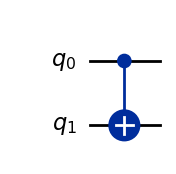

In [4]:
oracle_f2 = QuantumCircuit(2, name='f2')
oracle_f2.cx([0],[1])
oracle_f2.draw('mpl')

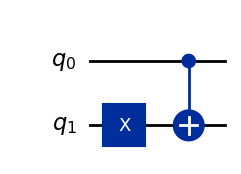

In [5]:
oracle_f3 = QuantumCircuit(2, name='f3')
oracle_f3.x([1])
oracle_f3.cx([0],[1])
oracle_f3.draw('mpl')

On code maintenant l'algorithme de Deutsch qui prend en entrée l'oracle de la fonction à évaluer.

In [6]:
def Deutsch(f_oracle):
    # Création du circuit quantique pour l'algorithme de Deutsch
    circuit = QuantumCircuit(2, 1)  # 2 qubits, 1 bit classique
    
    # Préparation de l'état initial
    circuit.h(0)
    circuit.x(1)
    circuit.h(1)
    
    #utilisation de la representation de la fonction à evaluer
    circuit.append(f_oracle, [0, 1])
    
    # Ajoute une porte de Hadamard au premier qubit pour finaliser
    circuit.h(0)
    
    # Mesure le premier qubit
    circuit.measure(0, 0)
    
    # Affiche le circuit
    circuit.draw('mpl')

    return circuit

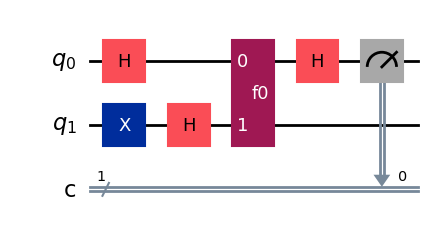

In [7]:
circuit_0 = Deutsch(oracle_f0)
circuit_0.draw('mpl')

On profite de cet exercice pour introduire la notion de bruit. Le bruit provient de divers phénomènes physiques qui affectent la cohérence des qubits lors de l'exécution. Ainsi, avec un simulateur, on obtient toujours le même état, alors que si l'on utilise un véritable ordinateur quantique, les états obtenus peuvent varier d'une exécution à l'autre.

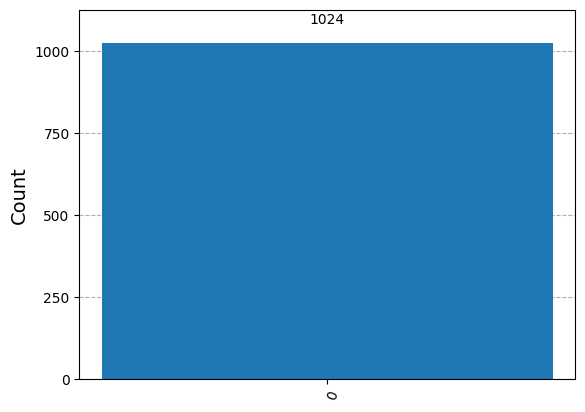

In [8]:
backend = AerSimulator()
transpiled_circuit_0 = transpile(circuit_0, backend)
job = backend.run(transpiled_circuit_0)
counts = job.result().get_counts()
plot_histogram(counts)

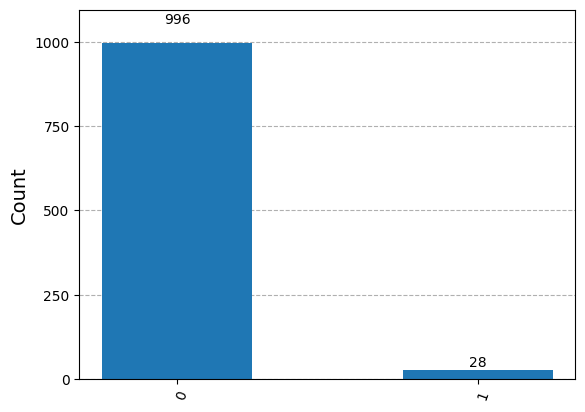

In [9]:
backend = FakeManilaV2()
transpiled_circuit_0 = transpile(circuit_0, backend)
job = backend.run(transpiled_circuit_0)
counts = job.result().get_counts()
plot_histogram(counts)

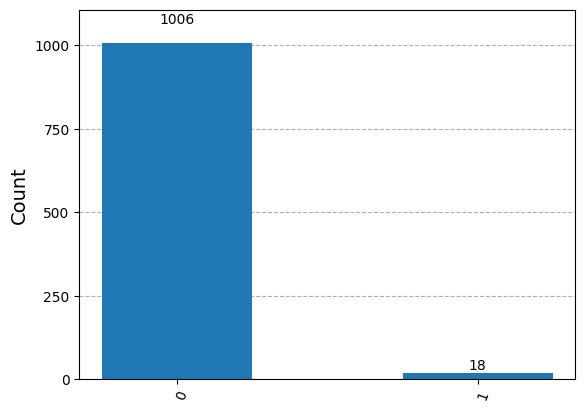

In [10]:
circuit_1 = Deutsch(oracle_f1)
transpiled_circuit_1 = transpile(circuit_1, backend)
job = backend.run(transpiled_circuit_1)
counts = job.result().get_counts()
plot_histogram(counts)

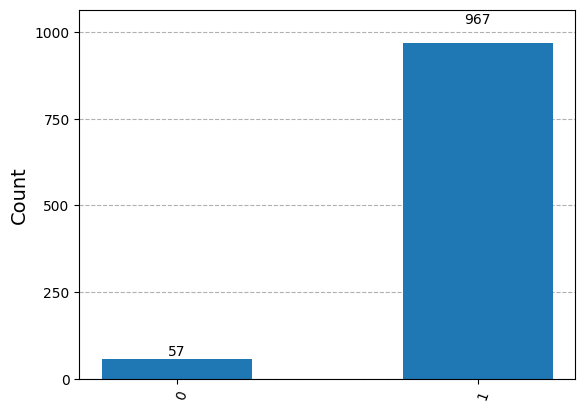

In [11]:
circuit_2 = Deutsch(oracle_f2)
transpiled_circuit_2 = transpile(circuit_2, backend)
job = backend.run(transpiled_circuit_2)
counts = job.result().get_counts()
plot_histogram(counts)

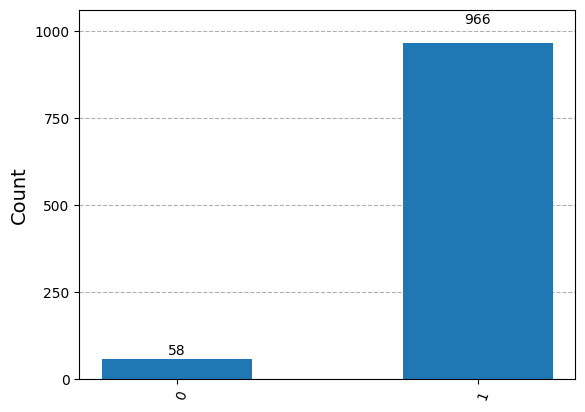

In [12]:
circuit_3 = Deutsch(oracle_f3)
transpiled_circuit_3 = transpile(circuit_3, backend)
job = backend.run(transpiled_circuit_3)
counts = job.result().get_counts()
plot_histogram(counts)